<a href="https://colab.research.google.com/github/ApooravTyagi/FND/blob/main/FND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [2]:
fake = pd.read_csv("/content/Fake.csv")
true = pd.read_csv("/content/True.csv")

In [3]:
fake.shape

(24411, 4)

In [4]:
true.shape

(22377, 4)

In [5]:
fake['target'] = 'fake'
true['target'] = 'true'

In [6]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(46788, 5)

In [7]:

from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [8]:

data.head()

,title,text,subject,date,target
0,Video Shows Whales Swimming That May Change E...,We know that the BP Deepwater Horizon oil spil...,News,"May 27, 2016",fake
1,Trump Jr. Was Told Before Meeting That Putin ...,Things just keep getting worse for Donald Trum...,News,"July 10, 2017",fake
2,"Amid Trump backlash, his U.N. envoy says stand...",WASHINGTON (Reuters) - U.S. Ambassador to the ...,politicsNews,"August 19, 2017",true
3,Argentine survivor of New York attack pleads f...,(Reuters) - What has the world turned in to? ...,worldnews,"November 3, 2017",true
4,Secret Trump University Papers Reveal How Bus...,It is now clear why Donald Trump attacked the ...,News,"May 31, 2016",fake


In [9]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Video Shows Whales Swimming That May Change E...,We know that the BP Deepwater Horizon oil spil...,News,fake
1,Trump Jr. Was Told Before Meeting That Putin ...,Things just keep getting worse for Donald Trum...,News,fake
2,"Amid Trump backlash, his U.N. envoy says stand...",WASHINGTON (Reuters) - U.S. Ambassador to the ...,politicsNews,true
3,Argentine survivor of New York attack pleads f...,(Reuters) - What has the world turned in to? ...,worldnews,true
4,Secret Trump University Papers Reveal How Bus...,It is now clear why Donald Trump attacked the ...,News,fake


In [10]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,We know that the BP Deepwater Horizon oil spil...,News,fake
1,Things just keep getting worse for Donald Trum...,News,fake
2,WASHINGTON (Reuters) - U.S. Ambassador to the ...,politicsNews,true
3,(Reuters) - What has the world turned in to? ...,worldnews,true
4,It is now clear why Donald Trump attacked the ...,News,fake


In [11]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,we know that the bp deepwater horizon oil spil...,News,fake
1,things just keep getting worse for donald trum...,News,fake
2,washington (reuters) - u.s. ambassador to the ...,politicsNews,true
3,(reuters) - what has the world turned in to? ...,worldnews,true
4,it is now clear why donald trump attacked the ...,News,fake


In [12]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [13]:
data.head()

,text,subject,target
0,we know that the bp deepwater horizon oil spil...,News,fake
1,things just keep getting worse for donald trum...,News,fake
2,washington reuters us ambassador to the unite...,politicsNews,true
3,reuters what has the world turned in to a f...,worldnews,true
4,it is now clear why donald trump attacked the ...,News,fake


In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
data.head()

,text,subject,target
0,know bp deepwater horizon oil spill one worst ...,News,fake
1,things keep getting worse donald trump jr word...,News,fake
2,washington reuters us ambassador united nation...,politicsNews,true
3,reuters world turned friend five argentines ki...,worldnews,true
4,clear donald trump attacked judge case oversee...,News,fake


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4847
politics            7383
politicsNews       11272
worldnews          11105
Name: text, dtype: int64


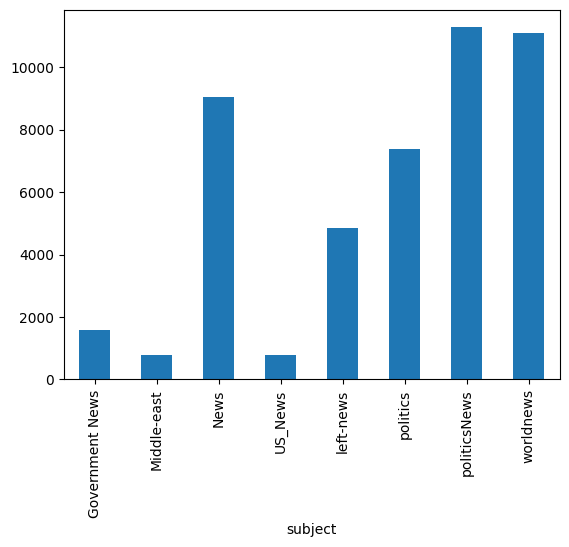

In [16]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    24411
true    22377
Name: text, dtype: int64


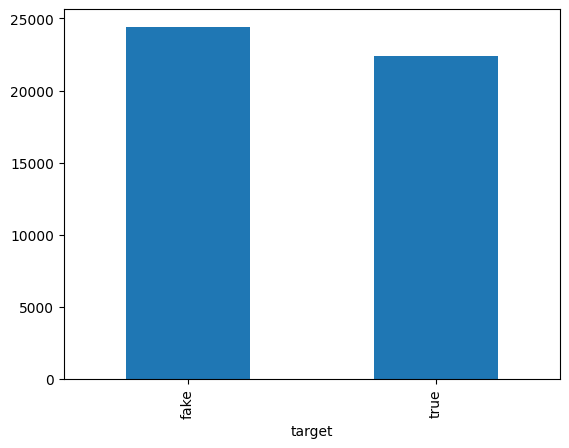

In [17]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

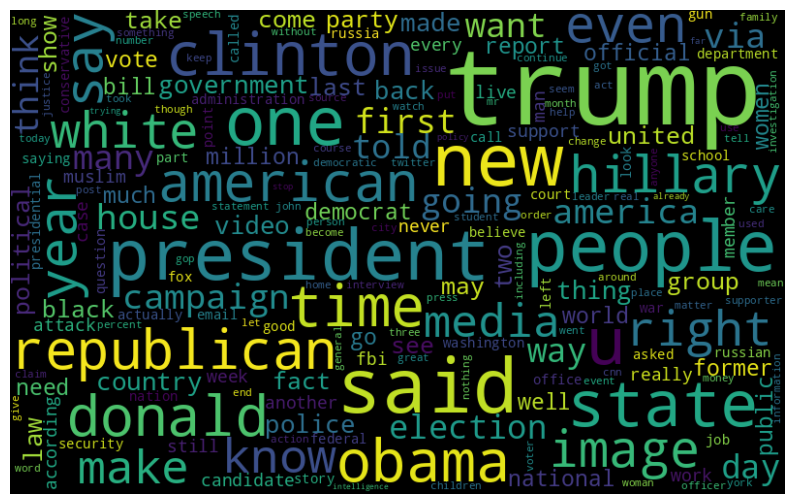

In [18]:
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

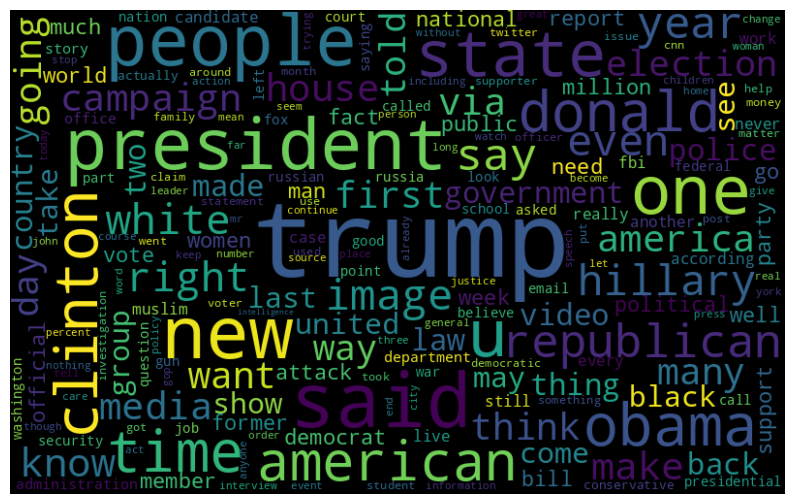

In [19]:
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

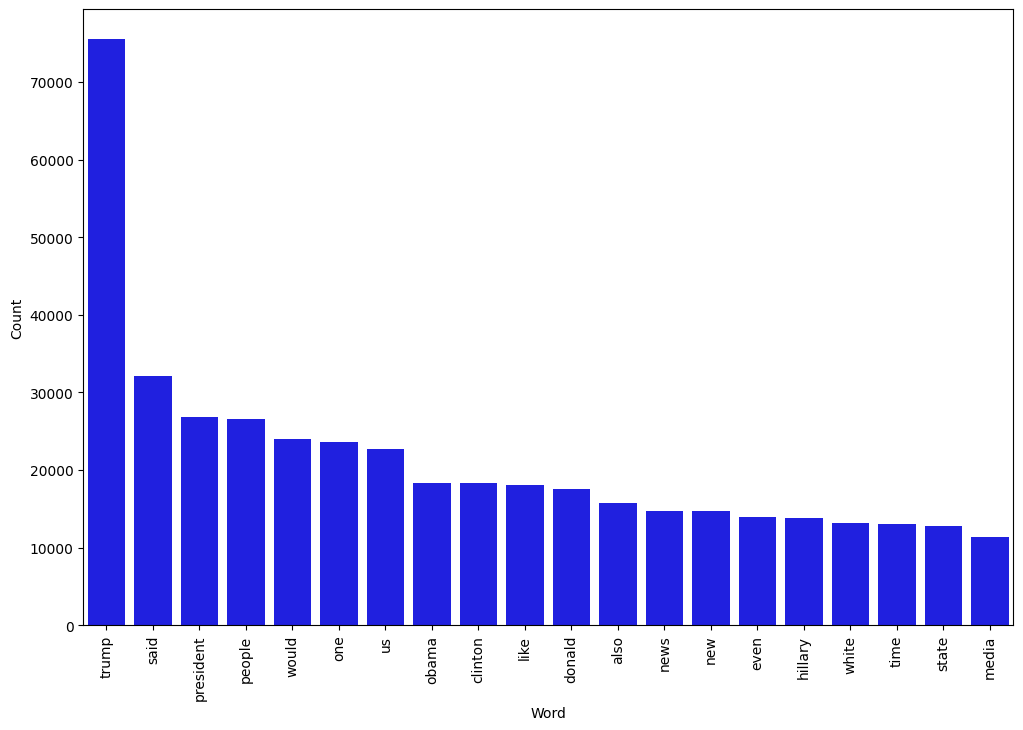

In [21]:
counter(data[data["target"] == "fake"], "text", 20)

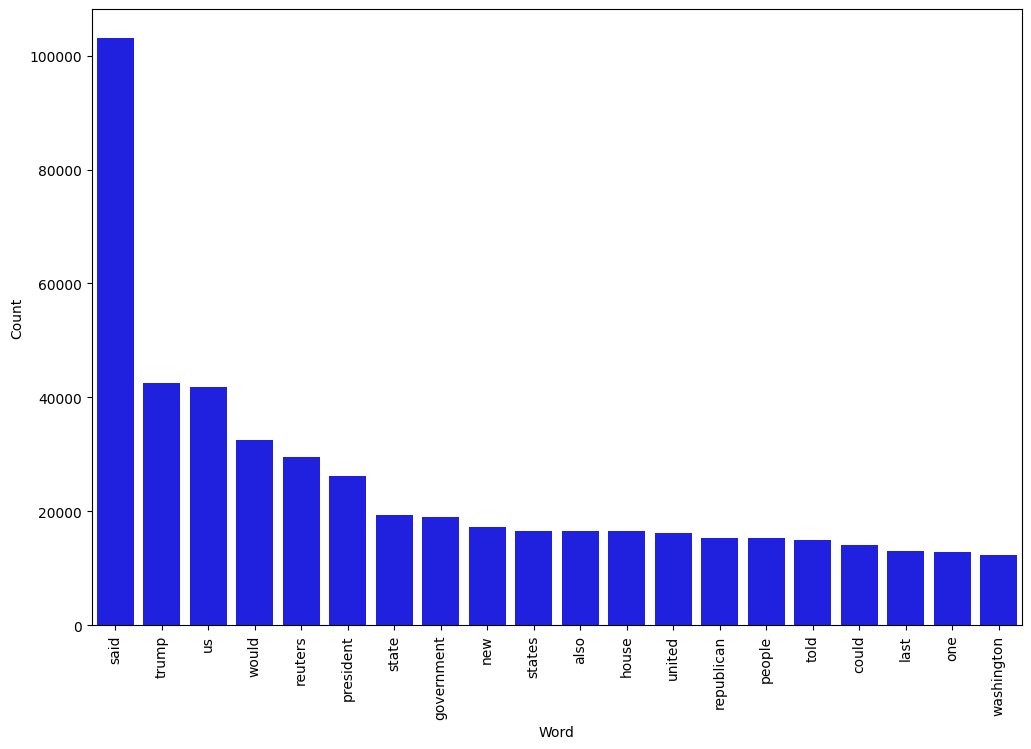

In [22]:
counter(data[data["target"] == "true"], "text", 20)

In [27]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [29]:
dct = dict()
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.67%


Confusion matrix, without normalization


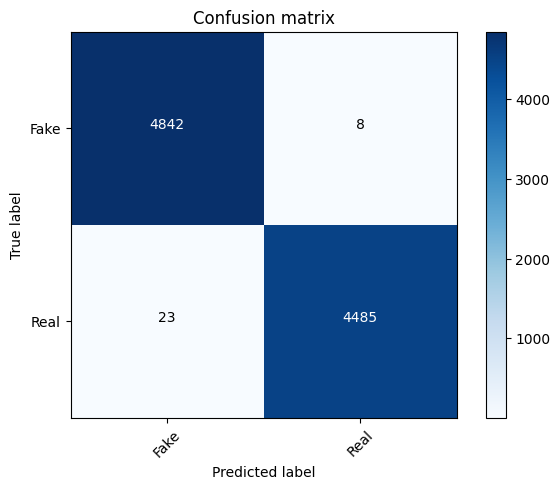

In [30]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [32]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.86%


Confusion matrix, without normalization


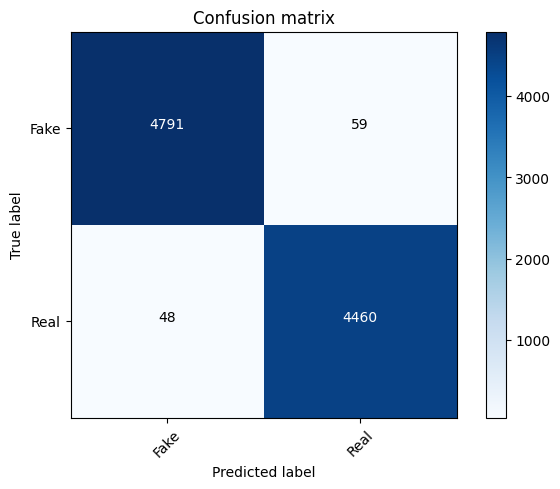

In [33]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [34]:
from sklearn import svm
from sklearn.pipeline import Pipeline

clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.65%


Confusion matrix, without normalization


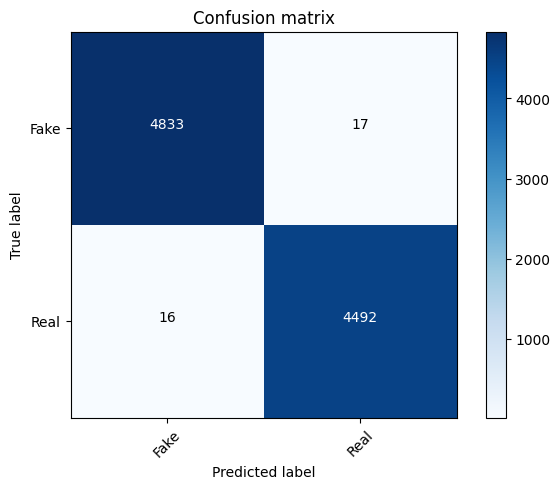

In [35]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

([<matplotlib.axis.YTick at 0x7f3ddeb82ce0>,
 [Text(0, 91, '91'),
  Text(0, 92, '92'),
  Text(0, 93, '93'),
  Text(0, 94, '94'),
  Text(0, 95, '95'),
  Text(0, 96, '96'),
  Text(0, 97, '97'),
  Text(0, 98, '98'),
  Text(0, 99, '99'),
  Text(0, 100, '100')])

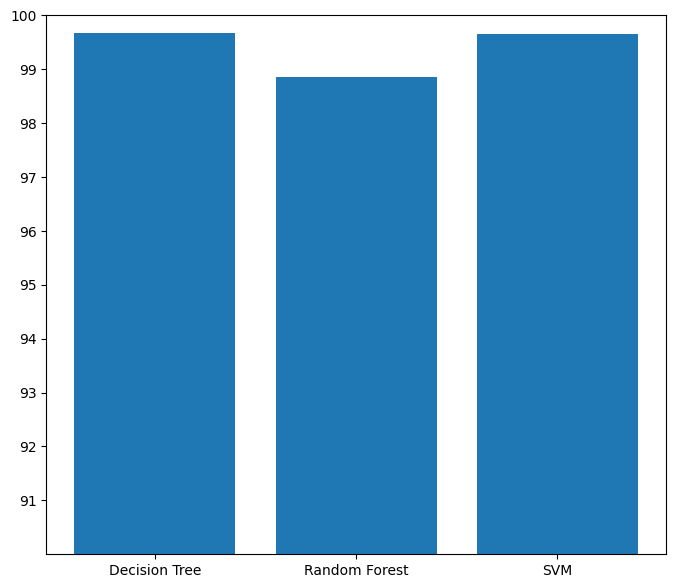

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))